In [1]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv("C:\\Users\\Admin\\Desktop\\creditcard.csv")

# Define the start time of the observation period
start_time = pd.Timestamp("2013-09-01 00:00:00")

# Convert elapsed seconds to timedelta objects
data['Time'] = pd.to_timedelta(data['Time'], unit='s')

# Add elapsed seconds to the start time to get the actual datetime values
data['Time'] = start_time + data['Time']

# Display the first few rows of the DataFrame
print(data.head())


                 Time        V1        V2        V3        V4        V5  \
0 2013-09-01 00:00:00 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1 2013-09-01 00:00:00  1.191857  0.266151  0.166480  0.448154  0.060018   
2 2013-09-01 00:00:01 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3 2013-09-01 00:00:01 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4 2013-09-01 00:00:02 -1.158233  0.877737  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...       V21       V22       V23  \
0  0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1 -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2  1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3  1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4  0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Amount  Class  

In [6]:
# Display the last row of the DataFrame
print(data.tail(1))


                      Time        V1        V2        V3        V4        V5  \
284806 2013-09-02 23:59:52 -0.533413 -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7       V8       V9  ...       V21       V22  \
284806 -0.649617  1.577006 -0.41465  0.48618  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   217.0   

        Class  
284806      0  

[1 rows x 31 columns]


In [7]:
# Step 1: Exploratory Data Analysis (EDA)

# Summary statistics
print("Summary statistics:")
print(data.describe())

# Distribution of features (optional)
# You can plot histograms or density plots to visualize the distribution of features

# Visualization of important features (optional)
# Depending on the dataset and task, you can plot scatter plots, box plots, or other visualizations to explore relationships between features and the target variable


Summary statistics:
                                Time            V1            V2  \
count                         284807  2.848070e+05  2.848070e+05   
mean   2013-09-02 02:20:13.859574784  1.759061e-12 -8.251130e-13   
min              2013-09-01 00:00:00 -5.640751e+01 -7.271573e+01   
25%       2013-09-01 15:03:21.500000 -9.203734e-01 -5.985499e-01   
50%              2013-09-01 23:31:32  1.810880e-02  6.548556e-02   
75%       2013-09-02 14:42:00.500000  1.315642e+00  8.037239e-01   
max              2013-09-02 23:59:52  2.454930e+00  2.205773e+01   
std                              NaN  1.958696e+00  1.651309e+00   

                 V3            V4            V5            V6            V7  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -9.654937e-13  8.321385e-13  1.649999e-13  4.248366e-13 -3.054600e-13   
min   -4.832559e+01 -5.683171e+00 -1.137433e+02 -2.616051e+01 -4.355724e+01   
25%   -8.903648e-01 -8.486401e-01 -6.915971e-01 -7.

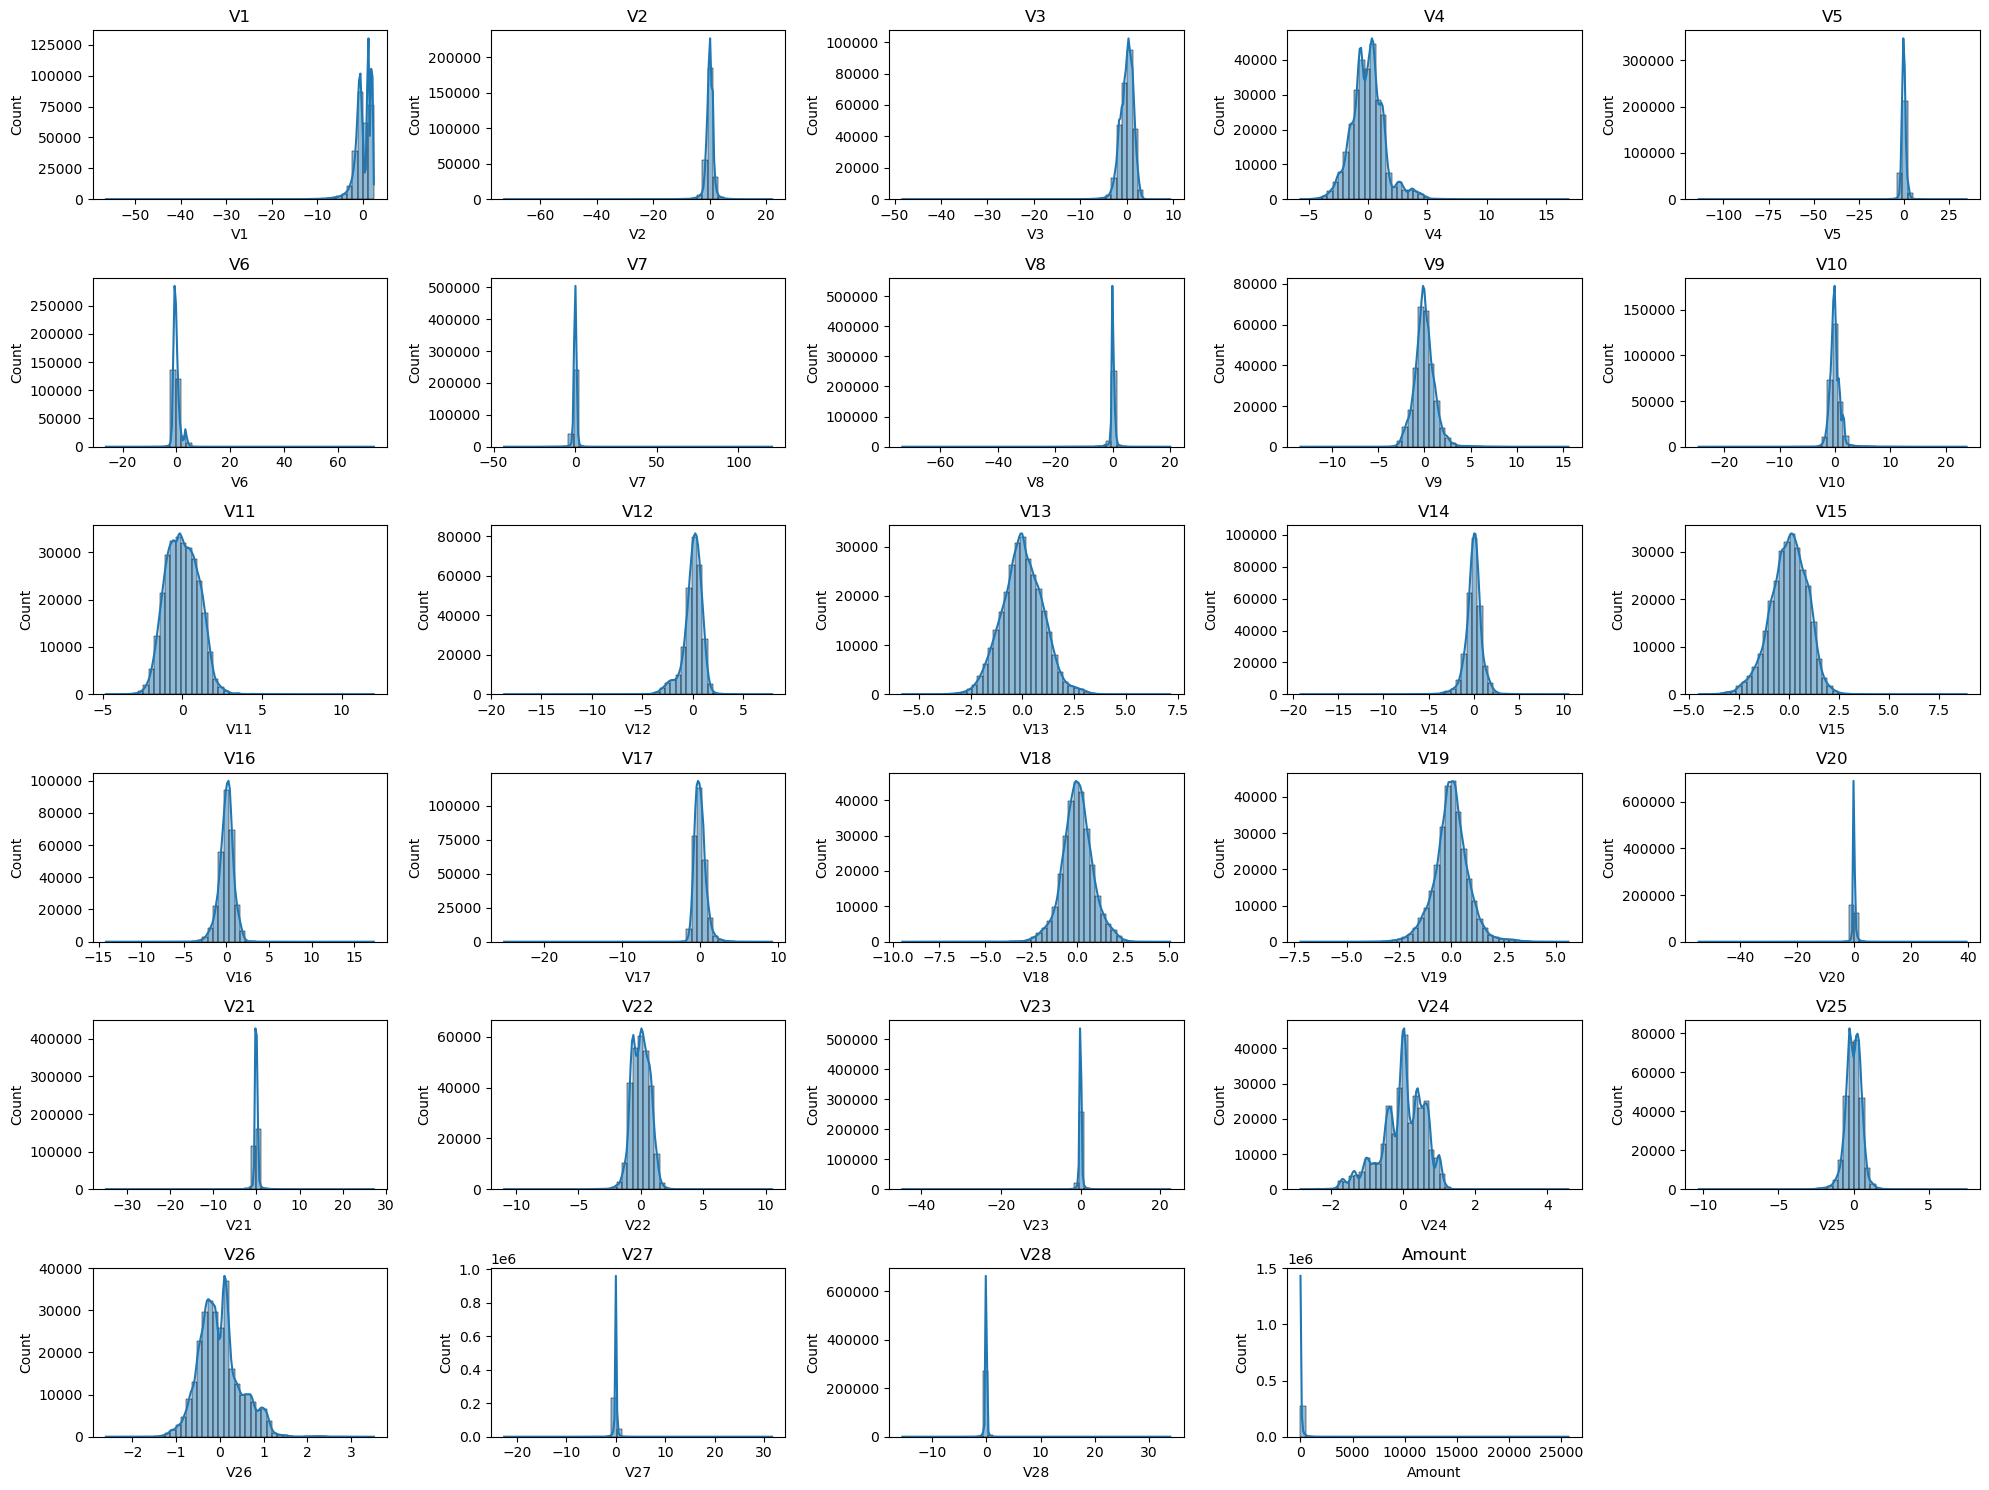

In [29]:
# Visualize the distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing distributions of all features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data.columns.drop(['Time', 'Class'])):
    plt.subplot(6, 5, i+1)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


In [8]:
# Step 2: Data Cleaning

# Handling Missing Values
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# If there are missing values, decide how to handle them
# For example, you can drop rows with missing values or impute them with a mean or median

# Drop rows with missing values
data.dropna(inplace=True)  # This will remove rows with any missing values

# Alternatively, you can impute missing values with a mean or median
# Example:
# data.fillna(data.mean(), inplace=True)  # Impute missing values with mean

# Handling Outliers
# Identify and deal with outliers in the dataset
# You can use statistical methods or visualization techniques to detect outliers

# Once outliers are identified, decide how to handle them (remove, cap, or transform features)


Missing values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Step 2: Data Cleaning (Continued)

# Handling Outliers
# Identify and deal with outliers in the dataset
# You can use statistical methods or visualization techniques to detect outliers
# Once outliers are identified, decide how to handle them (remove, cap, or transform features)

# Example: Detecting outliers using Z-score
import numpy as np  # Import NumPy library

from scipy import stats

# Calculate Z-score for each numeric column
z_scores = stats.zscore(data.drop(['Time', 'Class'], axis=1))

# Define threshold for outlier detection (e.g., Z-score > 3 or < -3)
threshold = 3

# Find indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Print indices of outliers
print("Indices of outliers:")
print(outlier_indices)


Indices of outliers:
(array([     2,      7,      7, ..., 284802, 284802, 284805], dtype=int64), array([15,  7, 27, ...,  9, 13, 18], dtype=int64))


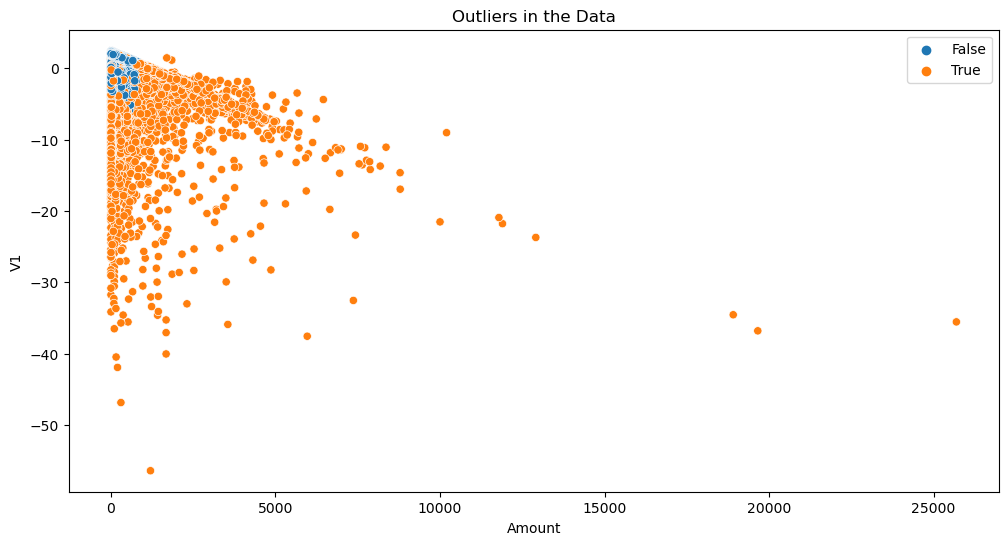

In [32]:
# Visualize Outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Amount', y='V1', hue=outliers)
plt.title('Outliers in the Data')
plt.show()

In [10]:
# Find outliers using z-scores
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Filter the DataFrame to get outliers directly
outliers = data.iloc[outlier_indices[0]]

# Print summary statistics of outliers
print("Summary statistics of outliers:")
print(outliers.describe())


Summary statistics of outliers:
                                Time            V1            V2  \
count                          83598  83598.000000  83598.000000   
mean   2013-09-02 01:59:58.186655488     -4.730923     -0.921326   
min              2013-09-01 00:00:01    -56.407510    -72.715728   
25%       2013-09-01 14:32:16.500000     -6.823604     -3.279753   
50%              2013-09-02 01:23:21     -3.157290      0.425127   
75%              2013-09-02 14:24:38     -0.897961      2.781868   
max              2013-09-02 23:59:48      2.439207     22.057729   
std                              NaN      5.835213      7.136205   

                 V3            V4            V5            V6            V7  \
count  83598.000000  83598.000000  83598.000000  83598.000000  83598.000000   
mean      -2.258698      0.935112     -0.818903      0.393654     -0.635138   
min      -48.325589     -5.683171   -113.743307    -26.160506    -43.557242   
25%       -3.512570     -0.896236     -

Here are some insights that can be gained from the summary statistics of the outliers:

Time: The outliers in time might suggest specific periods when fraudulent activities are more prevalent. Further investigation during these time periods could be warranted.

Amount: The outliers in transaction amounts are significantly higher than the majority of transactions. This could indicate instances of large-scale fraudulent activities where substantial amounts of money are involved.

Class: The outliers in the class variable represent fraudulent transactions. Understanding the distribution of fraud cases and their characteristics is crucial for developing effective fraud detection algorithms.

Features V1-V28: These are anonymized features representing different aspects of the transaction. The summary statistics of outliers for these features provide insights into the unusual patterns or behaviors associated with fraudulent transactions. For example, outliers in V1-V28 with extremely high or low values may indicate anomalous behavior that can be indicative of fraud.

Correlation with Class: Analyzing the correlation between each feature and the class variable (indicating fraud or not fraud) among outliers can help identify which features are most predictive of fraudulent transactions. This information can be valuable for feature selection in machine learning models.

Distribution Differences: Comparing the summary statistics of outliers with those of the overall dataset can reveal significant differences in distribution. This understanding can guide the development of anomaly detection algorithms tailored to identifying fraudulent transactions.

Overall, these insights help in understanding the characteristics and patterns associated with fraudulent transactions, which can inform the development of more effective fraud detection and prevention strategies. 

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' contains your dataset with features and labels
# Separate features and labels
X = data.drop(['Class', 'Time'], axis=1)  # Drop 'Time' column and 'Class' column
y = data['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Now you can train your model on the oversampled data


Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55808  1056]
 [    9    89]]


 Let's break down the classification report and confusion matrix to understand the performance:

### Classification Report
Precision for Class 0 (non-fraudulent transactions) is 1.00, which means that almost all transactions predicted as non-fraudulent are correct.

Recall for Class 0 is 0.98, meaning that 98% of actual non-fraudulent transactions are correctly identified.

F1-score for Class 0 is 0.99, indicating a strong balance between precision and recall for non-fraudulent transactions.

Precision for Class 1 (fraudulent transactions) is 0.08, which is low. This indicates that a significant portion of the transactions predicted as fraudulent are actually non-fraudulent.

Recall for Class 1 is 0.91, which is high. This means that 91% of actual fraudulent transactions are correctly identified.

F1-score for Class 1 is 0.14, indicating a weak balance between precision and recall for fraudulent transactions.

Confusion Matrix
True Negatives (TN): 55808 — Correctly identified non-fraudulent transactions.
False Positives (FP): 1056 — Non-fraudulent transactions incorrectly identified as fraudulent.
False Negatives (FN): 9 — Fraudulent transactions incorrectly identified as non-fraudulent.
True Positives (TP): 89 — Correctly identified fraudulent transactions.
Insights
High Recall for Fraudulent Transactions: The model is good at identifying actual fraudulent transactions (high recall for Class 1).
Low Precision for Fraudulent Transactions: The model struggles with precision for fraudulent transactions, meaning it often incorrectly flags non-fraudulent transactions as fraudulent (high false positives).
Imbalance Handling: Applying SMOTE improved recall significantly, but precision for the minority class is still an issue.
Next Steps
Hyperparameter Tuning: Fine-tuning the hyperparameters of the Logistic Regression model or trying different algorithms (e.g., Random Forest, Gradient Boosting) might improve performance.
Feature Engineering: Further exploration of features and their interactions could provide better insights for the model.
Ensemble Methods: Combining multiple models through techniques like stacking, bagging, or boosting might improve overall performance.
Threshold Adjustment: Adjusting the decision threshold for predicting fraudulent transactions could help balance precision and recall.
Anomaly Detection Methods: Consider using anomaly detection techniques specifically designed for detecting rare events.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix:
[[56853    11]
 [   15    83]]


#### It seems we did achieved our desired result with this model quite efficiently but let us further redefine it using hyperparameters tuning too after trying out some models

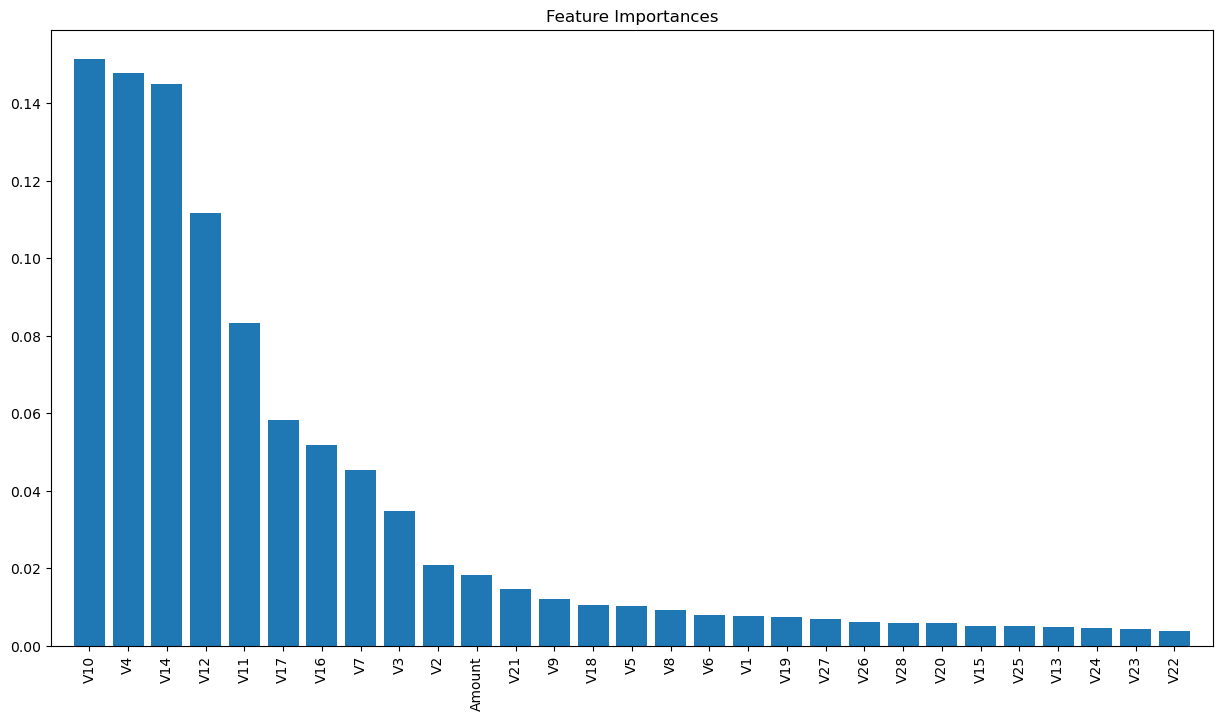

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
columns = X_train.columns

# Plot feature importances
plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [15]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean cross-validation F1 score: {np.mean(cv_scores)}")


Cross-validation F1 scores: [0.99984614 0.99992307 0.9998901  0.99990109 0.99986812]
Mean cross-validation F1 score: 0.9998857032714346


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=3,
                           n_jobs=-1)

# Perform grid search cross-validation
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [23]:
# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train_smote, y_train_smote)

# Predict and evaluate the model
y_pred_best_rf = best_rf_model.predict(X_test)
print("Random Forest Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best_rf))
print("Random Forest Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best_rf))


Random Forest Classification Report (Best Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.86      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix (Best Model):
[[56851    13]
 [   14    84]]


In [26]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



# Train and evaluate Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.92      0.26        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Gradient Boosting Confusion Matrix:
[[56348   516]
 [    8    90]]


In [28]:


# Cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X_train_smote, y_train_smote, cv=5, scoring='f1')
print(f"Gradient Boosting Cross-Validation F1 Scores: {cv_scores_gb}")
print(f"Gradient Boosting Cross-Validation F1 Mean: {cv_scores_gb.mean()}")

Gradient Boosting Cross-Validation F1 Scores: [0.98473586 0.98439917 0.98385901 0.983751   0.98405608]
Gradient Boosting Cross-Validation F1 Mean: 0.9841602244122883


In [35]:
import joblib

# Save the best model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']